# Solution to programming exercises week 2

INF2310 spring 2017

## Task 1

Import the necessary libraries

In [2]:
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pyplot as plt

Load and display the mona lisa image

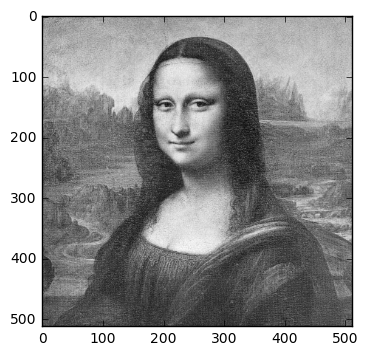

In [83]:
image = cv2.imread('../../assets/images/mona.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')

Let us print some properties with the image, like the shape, the data type and the size.

In [84]:
print(image.shape)
print(image.dtype)

(512, 512)
uint8


The type `uint8` is a common data type for images, and it means that each value in the image is stored as an unsigned 8-bit value. This means that the smallest value is 0 and the greatest value is 255, since

$$
2^{8} - 1 = 255.
$$

1 byte is 8 bits, so we could find the number of bytes the image occupies by multiplying the number of pixels in the image with 1 byte.

In [87]:
print(512 * 512 / 1024) # Result in KiB (Kibibyte)

256.0


Let us test this by measuring the size of the `image` object (notice that there is some overhed in python objects, so this is really not very reliable).

In [88]:
import sys
print(sys.getsizeof(image) / 1024)

256.109375


Okay, this was a bit (...) out of the purpouse of the task, let us get back to the actual matters in hand. Now, we initialize the resulting image, and populate it.

In [89]:
M, N = image.shape
diff_image = np.zeros((M, N), dtype='uint8') # Default type is 'float64'
for i in range(1, M): # From (including) to (not including) M
    for j in range(N): # Implicit from 0 to (not including) N
        diff_image[i, j] = image[i, j] - image[i - 1, j]

/home/oskrede/anaconda3/envs/inf2310/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in ubyte_scalars


This prints a warning on type overflow, since it is trying to assigning negative values to a `uint8` array. Fix this by adding a bias of e.g. 128

In [90]:
for i in range(1, M): # From (including) to (not including) M
    for j in range(N): # Implicit from 0 to (not including) N
        diff_image[i, j] = 128 + image[i, j] - image[i - 1, j]

Plot the result

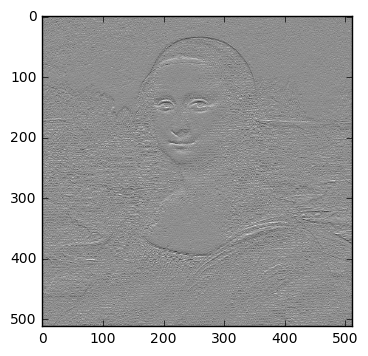

In [91]:
plt.imshow(diff_image, cmap='gray')

As you should expect, we get dark values at edges going from bright to dark values in the positive vertical direction. Similarly , we get bright values at edges going from dark values to bright values in the positive vertical direction.

Let us now try to scale the result image with a scalar greater than 1. We also change the datatype of `image` and `diff_image` to `int` (32-bit signed integer) to not get overflow warnings.

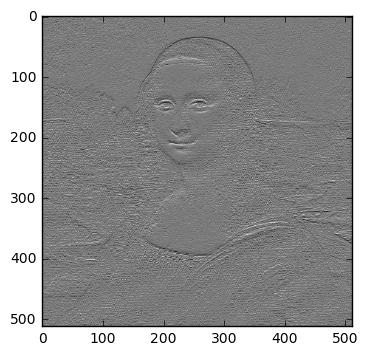

In [92]:
c = 2.5
image = image.astype('int')
diff_image = diff_image.astype('int')
for i in range(1, M): # From (including) to (not including) M
    for j in range(N): # Implicit from 0 to (not including) N
        diff_image[i, j] = 128 + c*(image[i, j] - image[i - 1, j])
plt.imshow(diff_image, cmap='gray')

The result is that the contrast increases (as we might expect).

## Task 4

Load and display the image, we will also display the number of unique values in the image.

Number of unique values:  216


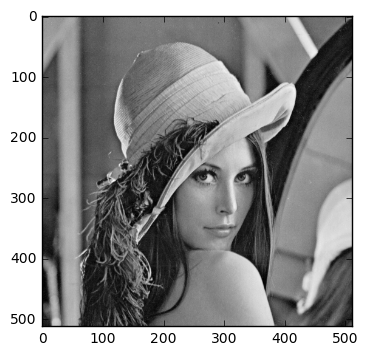

In [93]:
image = cv2.imread('../../assets/images/lena.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
print('Number of unique values: ', len(np.unique(image)))

Now, let us requantize the image, and display the effect. First, we try with 1 fewer bit.

Number of unique values:  110


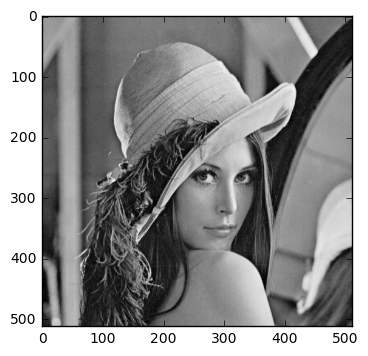

In [94]:
bit = 7
requantized_image = (image / (2**(8 - bit))).astype('uint8')
plt.imshow(requantized_image, cmap='gray')
print('Number of unique values: ', len(np.unique(requantized_image)))

Number of unique values:  56


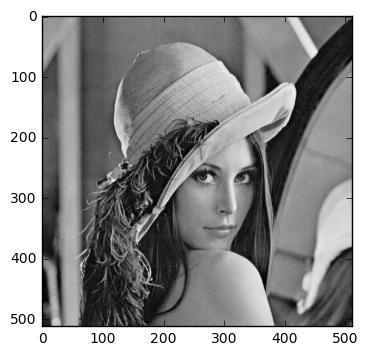

In [95]:
bit = 6
requantized_image = (image / (2**(8 - bit))).astype('uint8')
plt.imshow(requantized_image, cmap='gray')
print('Number of unique values: ', len(np.unique(requantized_image)))

Number of unique values:  28


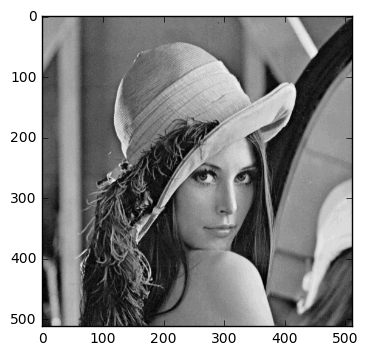

In [96]:
bit = 5
requantized_image = (image / (2**(8 - bit))).astype('uint8')
plt.imshow(requantized_image, cmap='gray')
print('Number of unique values: ', len(np.unique(requantized_image)))

Number of unique values:  15


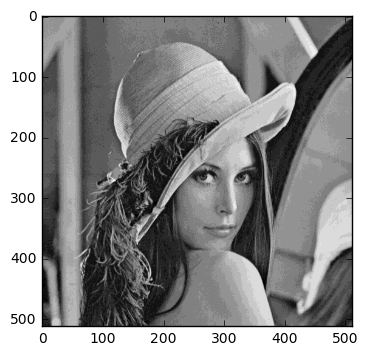

In [97]:
bit = 4
requantized_image = (image / (2**(8 - bit))).astype('uint8')
plt.imshow(requantized_image, cmap='gray')
print('Number of unique values: ', len(np.unique(requantized_image)))

Number of unique values:  8


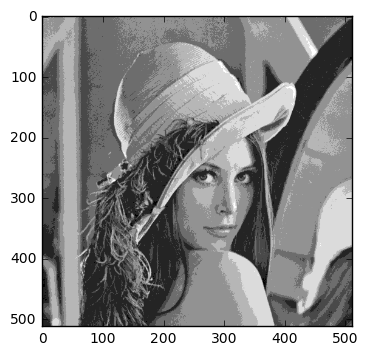

In [98]:
bit = 3
requantized_image = (image / (2**(8 - bit))).astype('uint8')
plt.imshow(requantized_image, cmap='gray')
print('Number of unique values: ', len(np.unique(requantized_image)))

Number of unique values:  4


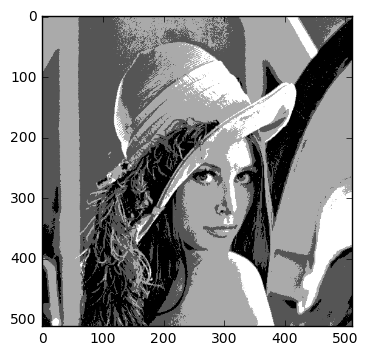

In [99]:
bit = 2
requantized_image = (image / (2**(8 - bit))).astype('uint8')
plt.imshow(requantized_image, cmap='gray')
print('Number of unique values: ', len(np.unique(requantized_image)))

Number of unique values:  2


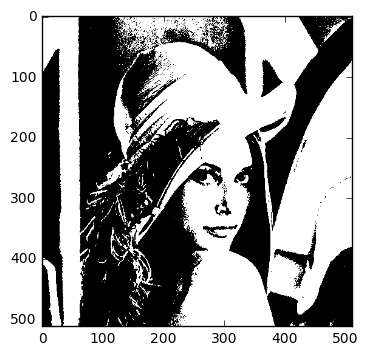

In [100]:
bit = 1
requantized_image = (image / (2**(8 - bit))).astype('uint8')
plt.imshow(requantized_image, cmap='gray')
print('Number of unique values: ', len(np.unique(requantized_image)))

As we can see, we ended up with a binary version of our original image. However, we also see that we could manage with only 5 bits, and still have a quite good visual impression of the image.